In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("churndata.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df = df.set_index('CustomerId')

In [7]:
df = df.drop(['RowNumber', 'Surname'], axis=1)

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

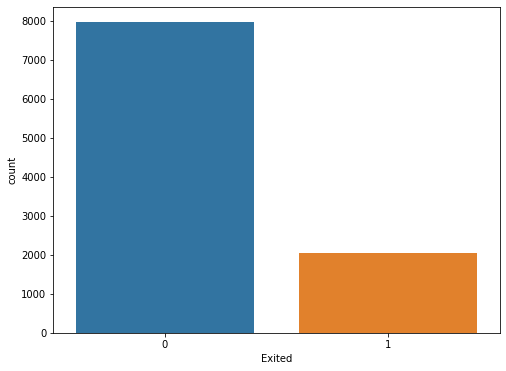

In [10]:
plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x='Exited')

In [11]:
df.groupby('Exited').count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


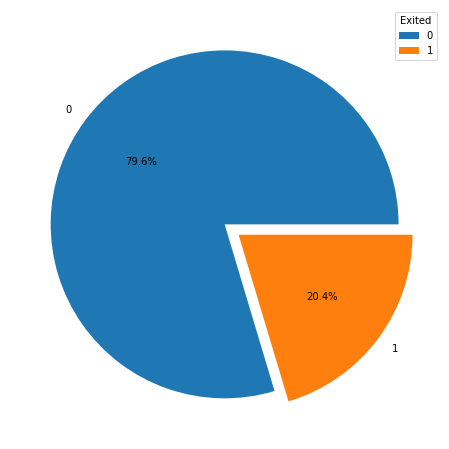

In [12]:
plt.subplots(figsize=(10, 8))
plt.pie(df['Exited'].value_counts(), labels=[0, 1], explode = [0, 0.1], autopct='%1.1f%%')
plt.legend(title = "Exited")
plt.show()

In [13]:
one_hot = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
one_hot

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [16]:
X = one_hot.drop('Exited',axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,0,0,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1
15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,1
15584532,709,36,7,0.00,1,0,1,42085.58,0,0,0


In [17]:
y = one_hot['Exited']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar = StandardScaler()

In [22]:
S_X_train = scalar.fit_transform(X_train)

In [23]:
S_X_test = scalar.fit_transform(X_test)

# SVC

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC()

In [27]:
param_grid = {'C':[0.1, 1, 2, 3, 4, 5, 6],'kernel':['rbf', 'sigmoid', 'poly'], 'gamma':[0.001, 0.01, 0.1, 1, 2, 3]}

In [28]:
svm_grid = GridSearchCV(svc, param_grid=param_grid,  cv=10, scoring='accuracy')

In [29]:
svm_grid.fit(S_X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.001, 0.01, 0.1, 1, 2, 3],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [30]:
svm_grid.best_params_

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}

In [31]:
svm_cv_result = svm_grid.cv_results_['mean_test_score']

In [32]:
param_grid = {'C':[0.1, 1, 2, 3, 4 , 5],'kernel':['poly'], 'gamma':[0.001, 0.01, 0.1, 1, 2, 3],'degree': [3, 4, 5]}

In [33]:
svmp_grid = GridSearchCV(svc, param_grid=param_grid,  cv=10, scoring='accuracy')

In [ ]:
svmp_grid.fit(S_X_train, y_train)

In [35]:
svmp_grid.best_params_

{'C': 5, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
svmp_cv_result = svmp_grid.cv_results_['mean_test_score']

# log regg

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log = LogisticRegression(solver='saga', max_iter=2000)

In [37]:
C = np.logspace(0, 4, 10)

In [38]:
penalty = ['l1', 'l2']
#l1_ratio = []

In [39]:
log_grid = GridSearchCV(log,param_grid={'C':C,'penalty':penalty} ,cv=10, scoring='accuracy')

In [40]:
log_grid.fit(S_X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [41]:
log_grid.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [42]:
log_cv_result = log_grid.cv_results_['mean_test_score']

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
k_values = list(range(1,20))

In [46]:
param_grid = {'n_neighbors' : k_values}

In [47]:
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [48]:
knn_grid.fit(S_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [49]:
knn_grid.best_params_

{'n_neighbors': 15}

In [50]:
knn_cv_result = knn_grid.cv_results_['mean_test_score']

# Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
DT = DecisionTreeClassifier()

In [158]:
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
max_depth = np.arange(1, 6)
max_features = np.arange(1, 12)

In [159]:
param_grid = {'max_depth':max_depth, 'criterion':['gini', 'entropy'], 'max_features' : max_features,  'min_samples_split':min_samples_split}

In [160]:
DF_grid = GridSearchCV(DT, param_grid=param_grid, cv=10, scoring='accuracy')

In [161]:
DF_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy')

In [162]:
DF_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_split': 0.1}

In [163]:
DF_cv_result = DF_grid.cv_results_['mean_test_score']

# Randon Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
RF = RandomForestClassifier()

In [232]:
n_estimators = [10, 32, 64, 100, 120]
max_features = np.arange(1, 8)
max_depth = np.arange(1, 12)

In [238]:
param_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'bootstrap':['True']}

In [239]:
RF_grid = GridSearchCV(RF, param_grid=param_grid, cv=10, scoring='accuracy')

In [240]:
RF_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True'],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': [10, 32, 64, 100, 120]},
             scoring='accuracy')

In [241]:
RF_grid.best_params_

{'bootstrap': 'True', 'max_features': 2, 'n_estimators': 120}

In [242]:
RF_cv_result = RF_grid.cv_results_['mean_test_score']

# Navis bayes

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
gnb = GaussianNB()

In [192]:
param_grid = {'var_smoothing': np.logspace(0,-20, num=100)}

In [193]:
NB_grid = GridSearchCV(gnb, param_grid=param_grid, cv=10, scoring='accuracy')

In [194]:
NB_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.28029144e-01, 3.94420606e-01, 2.47707636e-01,
       1.55567614e-01, 9.77009957e-02, 6.13590727e-02, 3.85352859e-02,
       2.42012826e-02, 1.51991108e-02, 9.54548457e-03, 5.99484250e-03,
       3.76493581e-03, 2.36448941e-03, 1.48496826e-03, 9.32603347e-04,
       5.85702082e-04, 3.67837977e-04, 2.3...
       4.43062146e-16, 2.78255940e-16, 1.74752840e-16, 1.09749877e-16,
       6.89261210e-17, 4.32876128e-17, 2.71858824e-17, 1.70735265e-17,
       1.07226722e-17, 6.73415066e-18, 4.22924287e-18, 2.65608778e-18,
       1.66810054e-18, 1.04761575e-18, 6.57933225e-19, 4.13201240e-19,
       2.59502421e-19, 1.62975083e-19, 1.02353102e-19, 6.42807312e-20,
       4.03701726e-20, 2.53536449e-20, 1.59228279e-20, 1.00000000e-20])},
             scoring='accuracy')

In [195]:
NB_grid.best_params_

{'var_smoothing': 1.9630406500402685e-11}

In [196]:
NB_cv_result = NB_grid.cv_results_['mean_test_score']

### Plotting the model vs accuracy on training data 

In [243]:
models_accuracy = []

In [244]:
models_accuracy.append(('SVC_linear', svm_cv_result.mean(), svm_cv_result.std()))
models_accuracy.append(('log', log_cv_result.mean(), log_cv_result.std()))
models_accuracy.append(('knn', knn_cv_result.mean(), knn_cv_result.std()))
models_accuracy.append(('Decision Tree',  DF_cv_result.mean(), DF_cv_result.std()))
models_accuracy.append(('Random Forest', RF_cv_result.mean(), RF_cv_result.std()))
models_accuracy.append(('Navis Bayes', NB_cv_result.mean(), NB_cv_result.std()))

In [245]:
results = []
results.append(svm_cv_result)
results.append(log_cv_result)
results.append(knn_cv_result)
results.append(DF_cv_result)
results.append(RF_cv_result)
results.append(NB_cv_result)

In [246]:
models_accuracy

[('SVC_linear', 0.7712648809523809, 0.058949908129175305),
 ('log', 0.8127062500000001, 8.172935519136527e-05),
 ('knn', 0.8262302631578947, 0.008505925098003929),
 ('Decision Tree', 0.8073838636363636, 0.008876032645662111),
 ('Random Forest', 0.8549642857142856, 0.0045266641995524845),
 ('Navis Bayes', 0.8091350000000003, 0.013479911906240346)]

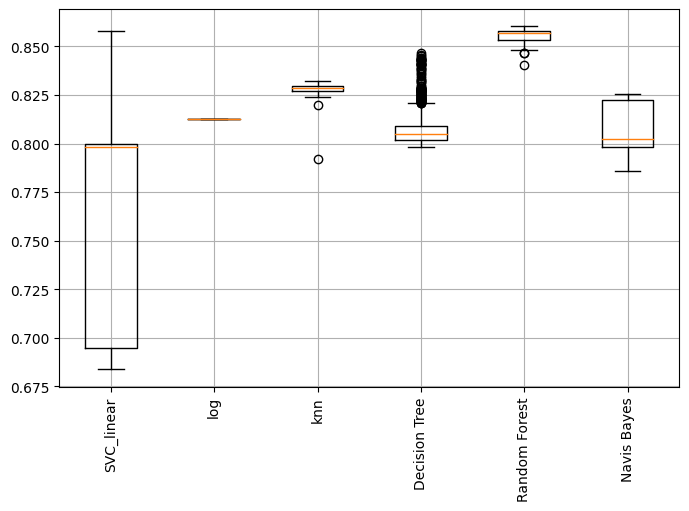

In [247]:
plt.subplots(figsize=(8, 5), dpi=100)
plt.boxplot(results, labels=['SVC_linear',  'log', 'knn', 
'Decision Tree', 'Random Forest', 'Navis Bayes'])
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

## selecting RF

#### Selecting Random forest model because it gives the highest accuracy on train data.
Prediction using the RF and calculation of metrics on test data

In [248]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [249]:
y_RFpred = RF_grid.predict(X_test)

In [250]:
accuracy_score(y_test, y_RFpred)

0.869

In [251]:
print(classification_report(y_test, y_RFpred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1577
           1       0.82      0.49      0.61       423

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



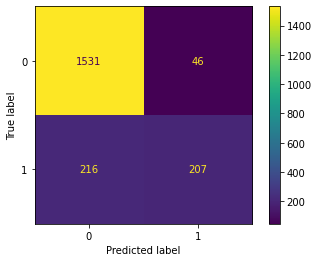

In [252]:
plot_confusion_matrix(RF_grid, X_test, y_test)

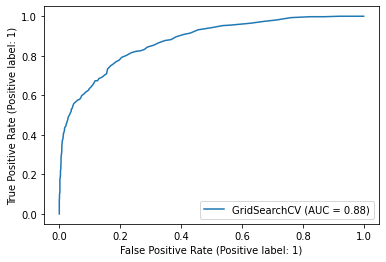

In [253]:
plot_roc_curve(RF_grid, X_test, y_test)